## 공통 코드

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)
# sklearn ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"
# 공통 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)
# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

import platform
from matplotlib import font_manager, rc
#매킨토시의 경우
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 다변량 선형 회귀

### 보스턴 주택 가격을 다변량 선형 회귀를 이용해서 예측

In [2]:
# 데이터 가져오기
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# boston 데이터 세트 DataFrame 변환
bostonDF = pd.DataFrame(data, columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX",
"RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"])
# boston 데이터 세트의 target 배열은 주택 가격임 . 이를 PRICE 칼럼으로 DataFrame에 추가함.
bostonDF['PRICE'] = target
print('Boston 데이터 세트 크기 :', bostonDF.shape)
bostonDF.head()

Boston 데이터 세트 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# 데이터 가져오기
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

print(y_target.head())
print(X_data.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [15]:
# 훈련 데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3,
                                                       random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


In [19]:
# 회귀 모델을 생성하고 훈련
from sklearn.linear_model import LinearRegression
# Linear Regression OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
# 평가
y_preds = lr.predict(X_test)

from sklearn.metrics import mean_squared_error , r2_score
mse = mean_squared_error(y_test, y_preds)
# mse 는 제곱을 하므로 실제 데이터보다 스케일이 큰 경우가 많음
# mse의 제곱근해서 많이 사용
rmse = np.sqrt(mse)
print('MSE :', mse)
print('RMSE :', rmse)
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))


MSE : 21.517444231177432
RMSE : 4.6386899261728445
Variance score : 0.711


In [21]:
# 회귀 계수와 절편 값을 확인
print('절편 값:',lr.intercept_)
print('회귀 계수값:', lr.coef_, 1)

절편 값: 31.63108403569186
회귀 계수값: [-1.33470103e-01  3.58089136e-02  4.95226452e-02  3.11983512e+00
 -1.54170609e+01  4.05719923e+00 -1.08208352e-02 -1.38599824e+00
  2.42727340e-01 -8.70223437e-03 -9.10685208e-01  1.17941159e-02
 -5.47113313e-01] 1


### score.csv 파일의 데이터를 이용해서 iq, academy, game, tv 로 score 예측

In [24]:
df = pd.read_csv("./data/score.csv", encoding="ms949")
df.head()

,name,score,iq,academy,game,tv
0,A,90,140,2,1,0
1,B,75,125,1,3,3
2,C,77,120,1,0,4
3,D,83,135,2,3,2
4,E,65,105,0,4,4


In [27]:
import statsmodels.formula.api as sm
result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = df).fit()
print('절편과 기울기 :', result.params)
print()
print('유의확률 :', result.pvalues)
print()
print('결정계수 :', result.rsquared)
print()
print('각 학생의 예측 점수 :', result.predict())

# 결정 계수가 높지만 pvalue 값도 높음

절편과 기울기 : Intercept    23.299232
iq            0.468422
academy       0.717901
game         -0.838955
tv           -1.385408
dtype: float64

유의확률 : Intercept    0.117508
iq           0.003376
academy      0.534402
game         0.131001
tv           0.184269
dtype: float64

결정계수 : 0.9608351062148871

각 학생의 예측 점수 : [89.47516936 75.89680196 74.68614801 82.68433242 63.58609587 80.84448722
 82.54342107 72.89049111 86.12886227 80.2641907 ]


In [31]:
#IQ가 130이고 학원을 3개 다니고 게임을 2시간하고 TV를 1시간 보는 학생의 예측 점수는?
y = result.params.Intercept + 130*result.params.iq + 3*result.params.academy + 2*result.params.game+1*result.params.tv
print("예측점수:" , y)

예측점수: 83.28448678034155


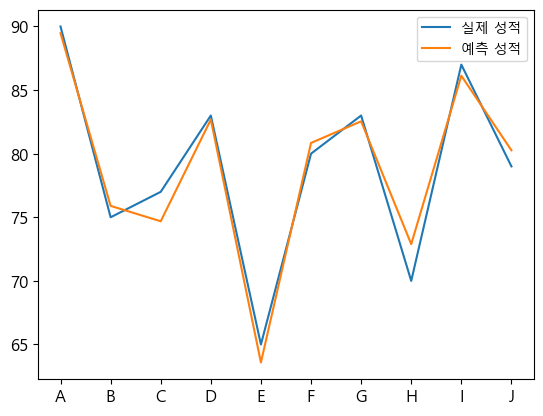

In [35]:
# 예측 값과 실제 값의 시각회
plt.figure()
plt.plot(df['score'], label='실제 성적')
plt.plot(result.predict(), label='예측 성적')
plt.xticks(range(0,10,1),df['name'])
plt.legend()
plt.show()


In [37]:
# VIF(분산 팽창 요인) 출력
X = df.drop(['score', 'name'], axis = 1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif)

result = sm.ols(formula = 'score ~ iq + academy + game + tv', data = df).fit()
print('절편과 기울기 :', result.params)
print('유의확률 :', result.pvalues)
print('결정계수 :', result.rsquared)

   VIF Factor features
0   31.162062       iq
1   13.444494  academy
2    3.054510     game
3    7.783607       tv
절편과 기울기 : Intercept    23.299232
iq            0.468422
academy       0.717901
game         -0.838955
tv           -1.385408
dtype: float64

유의확률 : Intercept    0.117508
iq           0.003376
academy      0.534402
game         0.131001
tv           0.184269
dtype: float64

결정계수 : 0.9608351062148871


In [ ]:
X = df.drop(['score', 'name', 'academy'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
print(vif.round(1))

### 보스턴 주택 가격에 Ridge 모델 적용

In [40]:
from sklearn.linear_model import Ridge

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)
print(y_target.head())
print(X_data.head())

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [42]:
# 적용할 규제 값
alphas = [0 , 0.1 , 1 , 10 , 100]

from sklearn.model_selection import cross_val_score

for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))


alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


## 비선형 회귀

### KNN

In [44]:
from sklearn.neighbors import KNeighborsRegressor
# 거리를 가지고 가중 평균을 구해서 예측
# uniform 을 설정하면 일반 평균
regressor = KNeighborsRegressor(n_neighbors = 3, weights = "distance")

X_train = [
    [0.5, 0.2, 0.1],
    [0.9, 0.7, 0.3],
    [0.4, 0.5, 0.7],
    [0.2, 0.3, 0.5]
]
y_train = [5.0, 6.8, 9.0, 4.3]
#모델 훈련
regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3, weights='distance')

In [45]:
X_test = [
    [0.2, 0.1, 0.7],
    [0.4, 0.7, 0.6],
    [0.5, 0.8, 0.1]
]
#예측
pred = regressor.predict(X_test)
print(pred)


[5.89282073 7.32372976 6.8457845 ]


### Decision Tree 를 이용한 회귀 및 시각화

In [47]:
# 샘플 데이터를 생성
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

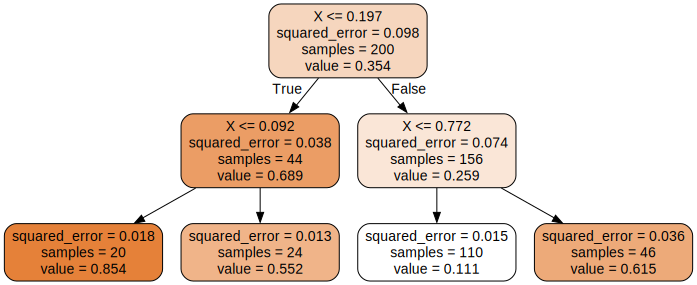

In [50]:
from sklearn.tree import DecisionTreeRegressor
# 터미널(자식이 없는 노드 - leaf node) 의 개수가 10 이상이어야 한다는 제약
# min_samples_leaf 를 설정하게 되면 각 터미널의 depth 가 일정하지 않을 수 있음
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

# 트리 시각화
from graphviz import Source
from sklearn.tree import export_graphviz

# 트리 시각화 파일 생성
export_graphviz(
    tree_reg,
    out_file="decision_tree.dot",
    feature_names=["X"],
    class_names="y",
    rounded=True,
    filled=True
)
with open('decision_tree.dot') as f:
    dot_graph = f.read()
src = Source(dot_graph)
src

### SVM 을 이용한 회귀

선형 SVM

In [52]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4+3*X+np.random.randn(m,1)).ravel()

X_train, X_test = X[:40], X[40:]
y_train, y_test = y[:40], y[40:]

In [56]:
# 모델 생성 과 훈련
from sklearn.svm import LinearSVR
# svm_reg = 마진이 큰 모형(epsilon=1.5)
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train,y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

0.9299366061913275


In [55]:
#마진이 작은 모형(epsilon=0.5)
svm_reg = LinearSVR(epsilon=0.5, random_state=42)
svm_reg.fit(X_train,y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(y_test)
print(y_pred)
print(rmse)

[4.51255752 7.32817403 5.68422517 8.93765219 4.74418629 7.47337666
 6.78566857 7.44915924 6.75050147 5.62239417]
[4.58791927 6.94083456 4.03522301 9.55231554 5.45017711 7.9960709
 5.7839468  7.09779142 7.26579056 4.984022  ]
0.7631717017333474


비선형 SVM

In [59]:
# 비선형 데이터 생성
m = 100
X = 2* np.random.rand(m,1) -1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m,1) / 10).ravel()

X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]


0.4124841370850596


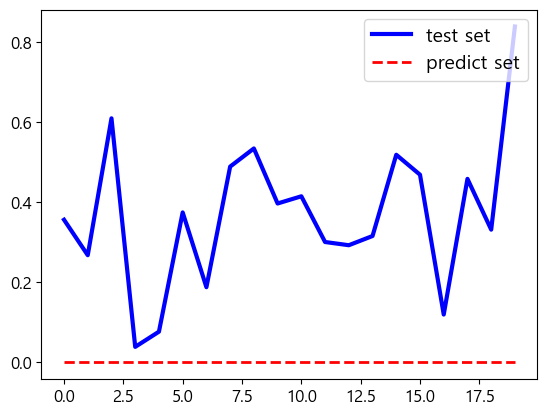

In [60]:
# 선형 SVM 적용
svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X_train,y_train)

y_pred = svm_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

plt.plot(y_test, "b-", linewidth=3, label="test set")
plt.plot(y_pred, "r--", linewidth=2, label="predict set")
plt.legend(loc="upper right", fontsize=14)
plt.show()

0.14773619945255503


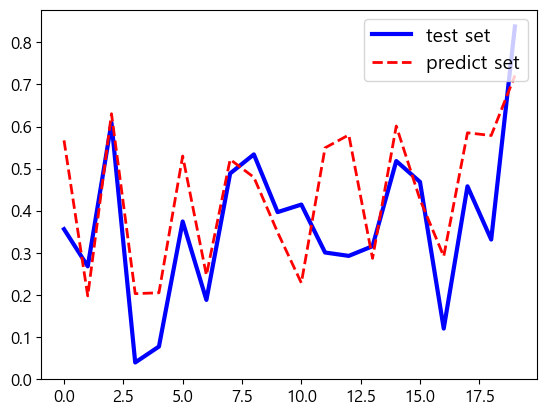

In [73]:
# 비선형 SVM 적용
from sklearn.svm import SVR
# 샘플 데이터가 2차 방정식으로 만들었으므로 degree = 2 가 가장 잘 맞음
# 샘플 데이터를 알지 못한다면 degree 는 하이퍼 파라미터 튜닝을 해야함
svm_poly_reg = SVR(kernel='poly', gamma='auto', degree=2, C=10, epsilon=0.1)
svm_poly_reg.fit(X_train,y_train)

y_pred = svm_poly_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(rmse)

plt.plot(y_test, "b-", linewidth=3, label="test set")
plt.plot(y_pred, "r--", linewidth=2, label="predict set")
plt.legend(loc="upper right", fontsize=14)
plt.show()
